In [1]:
import gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as no

env=gym.make("FrozenLake-v1", render_mode="human")
env.reset()
# render the environment
env.render()
env.close()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [2]:
env.observation_space

env.action_space
env.P[0][1] #state 0, action 1


[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

In [4]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:

discountFactor=0.9

valueFunctionVector=np.zeros(env.observation_space.n)

maxNumberOfIterations=1000

convergenceTolerance=10**(-6)
convergenceTrack=[]
for iterations in range(maxNumberOfIterations):
    convergenceTrack.append(np.linalg.norm(valueFunctionVector,2))
    valueFunctionVectorNextIteration=np.zeros(env.observation_space.n)
    for state in env.P:
        outerSum=0
        for action in env.P[state]:
            innerSum=0
            for probability, nextState, reward, isTerminalState in env.P[state][action]:
                #print(probability, nextState, reward, isTerminalState)
                innerSum=innerSum+ probability*(reward+discountFactor*valueFunctionVector[nextState])
            outerSum=outerSum+0.25*innerSum
        valueFunctionVectorNextIteration[state]=outerSum
    if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<convergenceTolerance):
        valueFunctionVector=valueFunctionVectorNextIteration
        print('Converged!')
        break
    valueFunctionVector=valueFunctionVectorNextIteration

Converged!


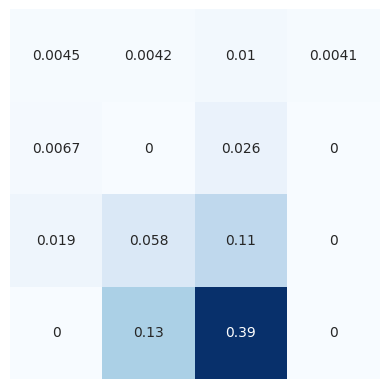

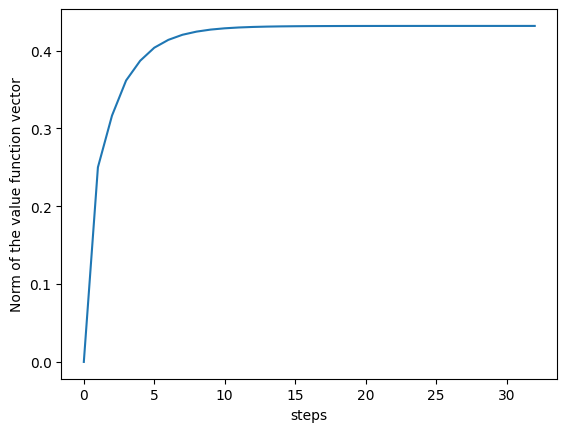

In [6]:
def grid_print(valueFunction,reshapeDim):
    ax = sns.heatmap(valueFunction.reshape(4,4),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)
    plt.savefig('valueFunctionGrid.png',dpi=600)
    plt.show()

grid_print(valueFunctionVector,4)

plt.plot(convergenceTrack)
plt.xlabel('steps')
plt.ylabel('Norm of the value function vector')
plt.savefig('convergence.png',dpi=600)
plt.show()